In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data1_a_label_50 = pd.read_csv('emotion_label/session1/A/emotion_A_20201111_1_50.csv')

#feature_data(特徴量データーセット)の読みこみ
data1_a_record_all_feature_50 = pd.read_csv('feature/A/data1_a_50_record_all_feature.csv')

#確認
display(data1_a_record_all_feature_50)
display(data1_a_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,9205,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,9205,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,9012,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,9012,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,9012,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,9200,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,8739,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,8739,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,8739,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788


,start_time,finish_time,emotion_level
0,5:48,5:52,1
1,5:49,5:53,1
2,5:50,5:54,1
3,5:51,5:55,1
4,5:52,5:56,1
...,...,...,...
682,20:19,20:23,2
683,20:20,20:24,2
684,20:21,20:25,2
685,20:22,20:26,2


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data1_a_label_50 = dropna(data1_a_label_50)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data1_a_label_50 = dropna(data1_a_label_50)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data1_a_label_50 = data1_a_label_50.drop(["start_time", "finish_time"], axis=1)

#確認
data1_a_label_50

,emotion_level
0,1
1,1
2,1
3,1
4,1
...,...
682,2
683,2
684,2
685,2


In [6]:
#feature_dataとemotion_labelデータを連結
data1_a_record_all_feature_50 = pd.concat([data1_a_record_all_feature_50, data1_a_label_50], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のAさんのデータを表示している)
display(data1_a_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [7]:
data1_a_record_all_feature_50

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,1
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,1
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,1
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,1
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,2020-11-11 12:54:49,2020-11-11 12:54:53,9832.002,376.364,-2677.213,111.254,73.332,-87.704,30536.553996,3.426154e+04,...,-47,-3789,-933,-2060,-812,8.610568,72.262946,0.782779,378.511950,2
683,2020-11-11 12:54:50,2020-11-11 12:54:54,9844.242,441.944,-2593.380,37.436,108.618,15.572,61678.375436,6.564020e+04,...,-1098,-3789,-4580,-2108,-812,5.870841,52.258742,0.782779,392.086007,2
684,2020-11-11 12:54:51,2020-11-11 12:54:55,9820.866,323.123,-2669.401,-241.840,-48.918,71.333,78599.508044,1.586836e+05,...,-1098,-4599,-4580,-2657,-1037,9.393346,46.718720,0.391389,366.460464,2
685,2020-11-11 12:54:52,2020-11-11 12:54:56,9706.397,324.454,-2956.586,-242.307,-201.340,50.513,146288.667391,1.591388e+05,...,-1098,-4812,-4580,-2657,-1037,15.655577,36.202566,0.391389,155.225788,2


In [8]:
#データ数の確認
print(len(data1_a_record_all_feature_50))

687


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している


data1_a_50_record_all_feature_1 = data1_a_record_all_feature_50.iloc[0:229]
data1_a_50_record_all_feature_2 = data1_a_record_all_feature_50.iloc[229:458]
data1_a_50_record_all_feature_3 = data1_a_record_all_feature_50.iloc[458:687]

In [10]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data1_a_50_record_all_feature_1 = emotion_level_define(data1_a_50_record_all_feature_1)
data1_a_50_record_all_feature_2 = emotion_level_define(data1_a_50_record_all_feature_2)
data1_a_50_record_all_feature_3 = emotion_level_define(data1_a_50_record_all_feature_3)

/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [11]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data1_a_50_record_all_feature_1 = emotion_level_drop(data1_a_50_record_all_feature_1)
data1_a_50_record_all_feature_2 = emotion_level_drop(data1_a_50_record_all_feature_2)
data1_a_50_record_all_feature_3 = emotion_level_drop(data1_a_50_record_all_feature_3)

/home/takagi/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
data1_a_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2020-11-11 12:45:53,2020-11-11 12:45:57,9747.959,-56.673,-3048.330,16.455,30.201,-27.322,43020.617319,6.075808e+04,...,-600,-4768,-1433,-2700,-568,2.348337,70.249941,2.739726,172.278417,other
225,2020-11-11 12:45:54,2020-11-11 12:45:58,9718.622,-76.345,-3132.979,36.964,-27.077,-9.247,50258.553116,7.374522e+04,...,-642,-4768,-1433,-2700,-568,5.870841,139.506115,1.956947,286.412719,other
226,2020-11-11 12:45:55,2020-11-11 12:45:59,9686.313,-86.935,-3239.260,22.867,10.285,-23.614,49495.235031,5.861538e+04,...,-642,-4768,-1433,-2700,-568,3.522505,130.502093,0.782779,296.252681,other
227,2020-11-11 12:45:56,2020-11-11 12:46:00,9678.743,-91.234,-3258.242,19.524,50.373,-24.169,34727.336951,6.774896e+04,...,-849,-4006,-1433,-2005,-616,3.131115,79.954740,1.174168,239.672410,other


In [13]:
#全データからpositiveの数を確認
data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "positive"]
data1_a_50_record_all_feature_positive_1 = data1_a_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_positive_1))

data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "positive"]
data1_a_50_record_all_feature_positive_2 = data1_a_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_positive_2))

data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "positive"]
data1_a_50_record_all_feature_positive_3 = data1_a_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_positive_3))

54
58
31


In [14]:
# #全データからotherの数を確認
data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_1[data1_a_50_record_all_feature_1.label == "other"]
data1_a_50_record_all_feature_other_1 = data1_a_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_other_1))

data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_2[data1_a_50_record_all_feature_2.label == "other"]
data1_a_50_record_all_feature_other_2 = data1_a_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_other_2))

data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_3[data1_a_50_record_all_feature_3.label == "other"]
data1_a_50_record_all_feature_other_3 = data1_a_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data1_a_50_record_all_feature_other_3))

175
171
198


In [34]:
#学習データとテストデータに分ける

train_data = pd.concat([data1_a_50_record_all_feature_1, data1_a_50_record_all_feature_2], ignore_index=True)
test_data = data1_a_50_record_all_feature_3

In [35]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,9989.120,419.244,-2052.121,22.665,5.644,5.692,46958.269600,2.519337e+04,...,-20,-3095,-1501,-2919,-562,6.653620,90.358921,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,9988.680,374.708,-2093.075,10.716,40.419,-23.403,46205.525600,2.660551e+04,...,-437,-3095,-1501,-2919,-714,5.870841,81.049321,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,10000.110,225.928,-2044.056,210.418,210.142,167.292,55977.995900,1.996043e+05,...,-1797,-3188,-1501,-2468,-714,5.479452,169.189386,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,10008.944,-301.132,-1579.636,259.055,385.835,304.251,51479.100864,1.098852e+06,...,-2847,-3188,-1501,-2468,-714,5.479452,141.644558,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,9981.447,-926.682,-977.567,231.636,435.985,297.311,56865.437191,1.851899e+06,...,-3279,-3188,-2049,-2212,-1074,5.479452,124.008126,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2020-11-11 12:50:07,2020-11-11 12:50:11,9824.368,504.902,-2699.251,-1.630,-60.200,-24.431,16012.276576,1.910653e+04,...,165,-3393,-775,-993,-324,3.131115,40.773915,5.870841,81.584394,positive
454,2020-11-11 12:50:08,2020-11-11 12:50:12,9775.165,507.423,-2878.888,-4.054,-70.348,-18.409,13843.613775,1.881136e+04,...,165,-3452,-775,-993,-324,3.131115,55.610867,0.391389,105.137120,positive
455,2020-11-11 12:50:09,2020-11-11 12:50:13,9731.786,513.594,-3024.387,0.588,-25.220,-18.696,9285.780204,1.609710e+04,...,165,-3452,-775,-993,-324,3.131115,55.450079,0.782779,91.919840,positive
456,2020-11-11 12:50:10,2020-11-11 12:50:14,9711.851,512.985,-3091.529,15.060,52.577,-22.562,6129.942799,1.359202e+04,...,165,-3452,-775,-993,-324,3.131115,33.262993,0.391389,110.794237,positive


In [36]:
train_data.columns

Index(['start_time', 'finish_time', 'accx_mean', 'accy_mean', 'accz_mean',
       'gyrx_mean', 'gyry_mean', 'gyrz_mean', 'accx_var', 'accy_var',
       'accz_var', 'gyrx_var', 'gyry_var', 'gyrz_var', 'accx_max', 'accy_max',
       'accz_max', 'gyrx_max', 'gyry_max', 'gyrz_max', 'accx_min', 'accy_min',
       'accz_min', 'gyrx_min', 'gyry_min', 'gyrz_min', 'accn_max_fq',
       'accn_max_peak', 'gyrn_max_fq', 'gyrn_max_peak', 'label'],
      dtype='object')

In [37]:
train_data = train_data[['start_time', 'finish_time', 'gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var', 'gyrx_max', 'gyry_max', 'gyrz_max', 'gyrx_min', 'gyry_min', 'gyrz_min', 'gyrn_max_fq', 'gyrn_max_peak', 'label']]

In [38]:
train_data

,start_time,finish_time,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 12:40:18,2020-11-11 12:40:22,22.665,5.644,5.692,205324.582775,597997.689264,16711.631136,1834,3074,547,-1501,-2919,-562,2.739726,327.603159,other
1,2020-11-11 12:40:19,2020-11-11 12:40:23,10.716,40.419,-23.403,224497.813344,567805.023439,22726.716591,2066,3074,547,-1501,-2919,-714,1.174168,324.534956,other
2,2020-11-11 12:40:20,2020-11-11 12:40:24,210.418,210.142,167.292,440862.123276,742656.481836,205307.848736,2108,3074,1633,-1501,-2468,-714,0.391389,421.393224,other
3,2020-11-11 12:40:21,2020-11-11 12:40:25,259.055,385.835,304.251,405569.557975,793478.601775,238257.093999,2108,3074,1633,-1501,-2468,-714,0.391389,562.283975,other
4,2020-11-11 12:40:22,2020-11-11 12:40:26,231.636,435.985,297.311,417799.129504,470606.594775,277375.570279,2108,2641,1633,-2049,-2212,-1074,0.391389,629.463949,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2020-11-11 12:50:07,2020-11-11 12:50:11,-1.630,-60.200,-24.431,81116.655100,61666.500000,19938.911239,712,799,395,-775,-993,-324,5.870841,81.584394,positive
454,2020-11-11 12:50:08,2020-11-11 12:50:12,-4.054,-70.348,-18.409,83180.217084,68330.632896,19938.483719,712,708,395,-775,-993,-324,0.391389,105.137120,positive
455,2020-11-11 12:50:09,2020-11-11 12:50:13,0.588,-25.220,-18.696,71901.326256,77608.535600,15546.839584,712,897,395,-775,-993,-324,0.782779,91.919840,positive
456,2020-11-11 12:50:10,2020-11-11 12:50:14,15.060,52.577,-22.562,58051.178400,68752.280071,12050.192156,712,909,395,-775,-993,-324,0.391389,110.794237,positive


In [39]:
X_train = train_data.iloc[0:,2:16]
y_train = train_data.label

X_test = test_data.iloc[0:,2:16]
y_test = test_data.label

# X_train = train_data[['accx_mean', 'accy_mean', 'accz_mean', 'accx_var', 'accy_var', 'accz_var', 'accx_max', 'accy_max', 'accz_max', 'accx_min', 'accy_min', 'accz_min', 'accn_max_fq', 'accn_max_peak']]
# y_train = train_data.label

# X_test = test_data[['accx_mean', 'accy_mean', 'accz_mean', 'accx_var', 'accy_var', 'accz_var', 'accx_max', 'accy_max', 'accz_max', 'accx_min', 'accy_min', 'accz_min', 'accn_max_fq', 'accn_max_peak']]
# y_test = test_data.label

# X_train = train_data[['gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var', 'gyrx_max', 'gyry_max', 'gyrz_max', 'gyrx_min', 'gyry_min', 'gyrz_min', 'gyrn_max_fq', 'gyrn_max_peak']]
# y_train = train_data.label

# X_test = test_data[['gyrx_mean', 'gyry_mean', 'gyrz_mean', 'gyrx_var', 'gyry_var', 'gyrz_var', 'gyrx_max', 'gyry_max', 'gyrz_max', 'gyrx_min', 'gyry_min', 'gyrz_min', 'gyrn_max_fq', 'gyrn_max_peak']]
# y_test = test_data.label

In [40]:
X_train

,gyrx_mean,gyry_mean,gyrz_mean,gyrx_var,gyry_var,gyrz_var,gyrx_max,gyry_max,gyrz_max,gyrx_min,gyry_min,gyrz_min,gyrn_max_fq,gyrn_max_peak
0,22.665,5.644,5.692,205324.582775,597997.689264,16711.631136,1834,3074,547,-1501,-2919,-562,2.739726,327.603159
1,10.716,40.419,-23.403,224497.813344,567805.023439,22726.716591,2066,3074,547,-1501,-2919,-714,1.174168,324.534956
2,210.418,210.142,167.292,440862.123276,742656.481836,205307.848736,2108,3074,1633,-1501,-2468,-714,0.391389,421.393224
3,259.055,385.835,304.251,405569.557975,793478.601775,238257.093999,2108,3074,1633,-1501,-2468,-714,0.391389,562.283975
4,231.636,435.985,297.311,417799.129504,470606.594775,277375.570279,2108,2641,1633,-2049,-2212,-1074,0.391389,629.463949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,-1.630,-60.200,-24.431,81116.655100,61666.500000,19938.911239,712,799,395,-775,-993,-324,5.870841,81.584394
454,-4.054,-70.348,-18.409,83180.217084,68330.632896,19938.483719,712,708,395,-775,-993,-324,0.391389,105.137120
455,0.588,-25.220,-18.696,71901.326256,77608.535600,15546.839584,712,897,395,-775,-993,-324,0.782779,91.919840
456,15.060,52.577,-22.562,58051.178400,68752.280071,12050.192156,712,909,395,-775,-993,-324,0.391389,110.794237


正答率0.8646288209606987
誤った個数：31
classification report
              precision    recall  f1-score   support

       other       0.86      1.00      0.93       198
    positive       0.00      0.00      0.00        31

    accuracy                           0.86       229
   macro avg       0.43      0.50      0.46       229
weighted avg       0.75      0.86      0.80       229

Confusion matrix, without normalization
[[198   0]
 [ 31   0]]


/home/takagi/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


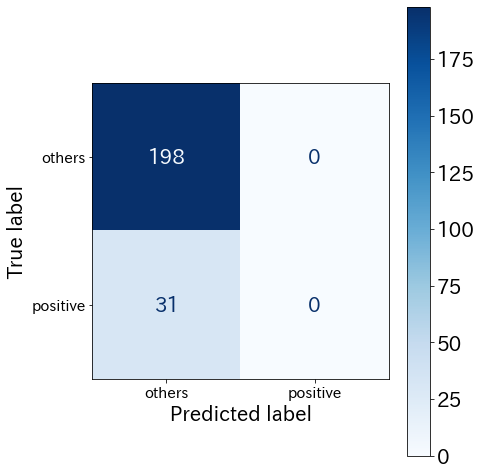

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


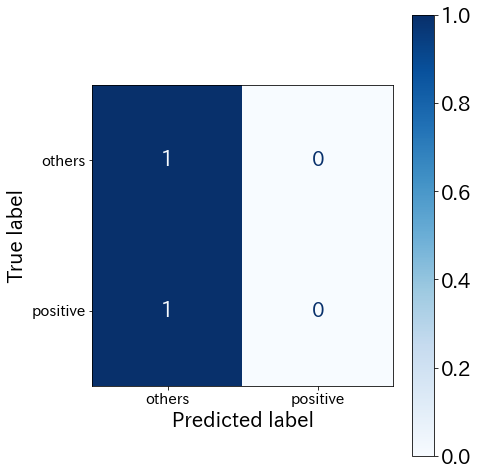

In [44]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["others", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
#     disp.ax_.set_title(title)
    plt.tick_params(axis='both', which='major', labelsize=15)
    print(title)
    print(disp.confusion_matrix)
    plt.rcParams.update({'font.size': 20})
    plt.xlabel("Predicted label", fontsize=20, rotation=0)
    plt.ylabel("True label", fontsize=20)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [45]:
random.feature_importances_

array([0.05030943, 0.04997895, 0.06546728, 0.0623745 , 0.07395545,
       0.07087906, 0.07497935, 0.12883382, 0.09651939, 0.07231204,
       0.07856179, 0.10651942, 0.02430162, 0.04500789])

# 1_50 0:229 229:458 458:687
# 1_60 0:228 228:456 456:687
# 1_70 0:218 218:436 436:687
# 1_80 0:212 212:424 424:687

In [46]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data1_a_record_all_feature_50.iloc[0:458]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data1_a_record_all_feature_50.iloc[458:687]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data1_a_record_all_feature_50.iloc[458:687]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 12:50:12,2020-11-11 12:50:16,other,0.0
1,2020-11-11 12:50:13,2020-11-11 12:50:17,other,0.0
2,2020-11-11 12:50:14,2020-11-11 12:50:18,other,0.0
3,2020-11-11 12:50:15,2020-11-11 12:50:19,other,0.0
4,2020-11-11 12:50:16,2020-11-11 12:50:20,other,0.0
...,...,...,...,...
224,2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
225,2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
226,2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0
227,2020-11-11 12:54:52,2020-11-11 12:54:56,other,0.0


In [47]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 12:50:12,2020-11-11 12:50:16,positive,1.0
1,2020-11-11 12:50:13,2020-11-11 12:50:17,positive,1.0
2,2020-11-11 12:50:14,2020-11-11 12:50:18,positive,1.0
3,2020-11-11 12:50:15,2020-11-11 12:50:19,positive,1.0
4,2020-11-11 12:50:16,2020-11-11 12:50:20,positive,1.0
...,...,...,...,...
224,2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
225,2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
226,2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0
227,2020-11-11 12:54:52,2020-11-11 12:54:56,other,0.0


In [48]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [49]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [50]:
test

,finish,emotion_level,label
start,,,
2020-11-11 12:40:18,2020-11-11 12:40:22,other,0.0
2020-11-11 12:40:19,2020-11-11 12:40:23,other,0.0
2020-11-11 12:40:20,2020-11-11 12:40:24,other,0.0
2020-11-11 12:40:21,2020-11-11 12:40:25,other,0.0
2020-11-11 12:40:22,2020-11-11 12:40:26,other,0.0
...,...,...,...
2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0


In [51]:
predicted

,finish,emotion_level,label
start,,,
2020-11-11 12:50:12,2020-11-11 12:50:16,other,0.0
2020-11-11 12:50:13,2020-11-11 12:50:17,other,0.0
2020-11-11 12:50:14,2020-11-11 12:50:18,other,0.0
2020-11-11 12:50:15,2020-11-11 12:50:19,other,0.0
2020-11-11 12:50:16,2020-11-11 12:50:20,other,0.0
...,...,...,...
2020-11-11 12:54:49,2020-11-11 12:54:53,other,0.0
2020-11-11 12:54:50,2020-11-11 12:54:54,other,0.0
2020-11-11 12:54:51,2020-11-11 12:54:55,other,0.0


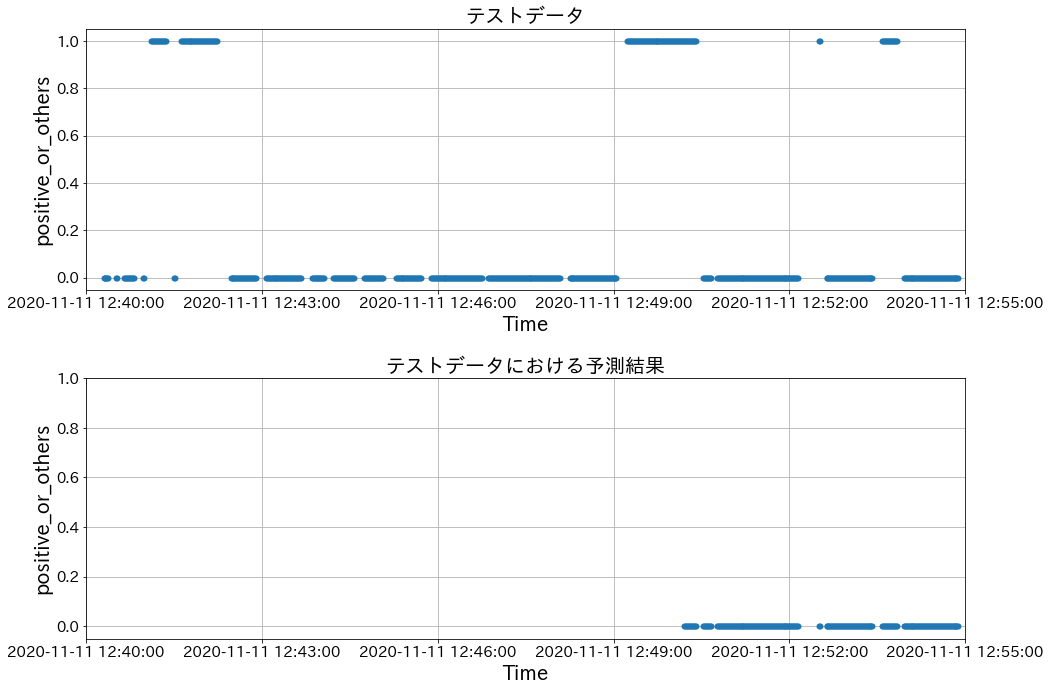

In [56]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,12,40,0), datetime.datetime(2020,11,11,12,55,0))
ax2.set_ylim(-0.05, 1)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(40, 56, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()